## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import Data
The cleaned data was stored as train_mod.csv and test_mod.csv

In [3]:
data = pd.read_csv('train_mod.csv')
test = pd.read_csv('test_mod.csv')
target_col = ['Severity']

### Recursive Forward Elimination

Since the dataset is not huge, RFE is used to greedily drop irrelevant columns for each model

In [4]:
label_dict = {}
for idx, val in enumerate(data['Severity'].unique()):
    label_dict[val] = idx+1

data['Severity'] = data['Severity'].apply(lambda row: label_dict[row] )

In [5]:
def remove_feature(drop_col, target_col, id_col, dataframe):
    cols = [i for i in dataframe.columns if i not in drop_col + target_col + id_col]
    return cols


def rfe_results(model, df, id_col, drop_col, target_col):
    Y = df[target_col]
    keep_cols = remove_feature(drop_col,target_col, id_col, df)
    X= df[keep_cols]
    scores = cross_val_score(model, X, Y, cv = 5)
    print('Eliminating column ',drop_col,' Score is: ',scores.sum()/len(scores))

def rfe_report(model, data):
    id_col = ['Accident_ID']
    target_col = ['Severity']
    all_cols = [i for i in data.columns if i not in id_col+target_col]
    
    for column in all_cols:
        drop_cols = [column]
        rfe_results(model, data, id_col, drop_cols, target_col)
    
    scores = cross_val_score(model, data[all_cols], data[target_col], cv = 5)
    print('Not Eliminating any column, score is: ',scores.sum()/len(scores))
    return all_cols

## AdaBoost

In [6]:
data_ab = data.copy()
test_ab = test.copy()

In [7]:
ab = AdaBoostClassifier(n_estimators= 200, learning_rate=1.0, random_state=123)

all_cols = rfe_report(ab,data_ab)

Eliminating column  ['Safety_Score']  Score is:  0.5708
Eliminating column  ['Days_Since_Inspection']  Score is:  0.5707000000000001
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.5662999999999999
Eliminating column  ['Control_Metric']  Score is:  0.6237
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.5677
Eliminating column  ['Cabin_Temperature']  Score is:  0.5687
Eliminating column  ['Accident_Type_Code']  Score is:  0.562
Eliminating column  ['Max_Elevation']  Score is:  0.57
Eliminating column  ['Violations']  Score is:  0.5699
Eliminating column  ['Adverse_Weather_Metric']  Score is:  0.5650999999999999
Eliminating column  ['ftr1']  Score is:  0.5556
Eliminating column  ['ftr2']  Score is:  0.5698000000000001
Eliminating column  ['ftr3']  Score is:  0.5600999999999999
Eliminating column  ['DSI_Segmented']  Score is:  0.5683999999999999
Not Eliminating any column, score is:  0.5683999999999999


## Gradient Boost

In [16]:
data_gb = data.copy()
test_gb = test.copy()

In [17]:
gb = GradientBoostingClassifier()
gb

GradientBoostingClassifier()

In [18]:
gb = GradientBoostingClassifier(max_depth = 2)

all_cols = rfe_report(gb,data_gb)

Eliminating column  ['Safety_Score']  Score is:  0.6952999999999999
Eliminating column  ['Days_Since_Inspection']  Score is:  0.7545999999999999
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.7723000000000001
Eliminating column  ['Control_Metric']  Score is:  0.7212
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.7703
Eliminating column  ['Cabin_Temperature']  Score is:  0.7722
Eliminating column  ['Accident_Type_Code']  Score is:  0.7743
Eliminating column  ['Max_Elevation']  Score is:  0.7721
Eliminating column  ['Violations']  Score is:  0.7727
Eliminating column  ['Adverse_Weather_Metric']  Score is:  0.7744
Eliminating column  ['ftr1']  Score is:  0.7499
Eliminating column  ['ftr2']  Score is:  0.7713
Eliminating column  ['ftr3']  Score is:  0.7699
Eliminating column  ['DSI_Segmented']  Score is:  0.7727
Not Eliminating any column, score is:  0.7727


In [19]:
data_gb = data_gb.drop(columns={'Adverse_Weather_Metric'})
all_cols.remove('Adverse_Weather_Metric')

all_cols= rfe_report(gb, data_gb)

Eliminating column  ['Safety_Score']  Score is:  0.6968
Eliminating column  ['Days_Since_Inspection']  Score is:  0.7552
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.7748999999999999
Eliminating column  ['Control_Metric']  Score is:  0.7207
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.7745
Eliminating column  ['Cabin_Temperature']  Score is:  0.7745999999999998
Eliminating column  ['Accident_Type_Code']  Score is:  0.7871999999999999
Eliminating column  ['Max_Elevation']  Score is:  0.7745
Eliminating column  ['Violations']  Score is:  0.7744
Eliminating column  ['ftr1']  Score is:  0.7484999999999999
Eliminating column  ['ftr2']  Score is:  0.7731
Eliminating column  ['ftr3']  Score is:  0.7680999999999999
Eliminating column  ['DSI_Segmented']  Score is:  0.7744
Not Eliminating any column, score is:  0.7744


In [20]:
data_gb = data_gb.drop(columns={'Accident_Type_Code'})
all_cols.remove('Accident_Type_Code')

all_cols= rfe_report(gb, data_gb)

Eliminating column  ['Safety_Score']  Score is:  0.6929
Eliminating column  ['Days_Since_Inspection']  Score is:  0.7585
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.7861
Eliminating column  ['Control_Metric']  Score is:  0.7414
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.7884
Eliminating column  ['Cabin_Temperature']  Score is:  0.7889999999999999
Eliminating column  ['Max_Elevation']  Score is:  0.7886000000000001
Eliminating column  ['Violations']  Score is:  0.7871999999999999
Eliminating column  ['ftr1']  Score is:  0.748
Eliminating column  ['ftr2']  Score is:  0.7876
Eliminating column  ['ftr3']  Score is:  0.8099999999999999
Eliminating column  ['DSI_Segmented']  Score is:  0.7870999999999999
Not Eliminating any column, score is:  0.7870999999999999


In [21]:
data_gb = data_gb.drop(columns={'ftr3'})
all_cols.remove('ftr3')

In [22]:
gb = GradientBoostingClassifier(max_depth = 2)
all_cols= rfe_report(gb, data_gb)

Eliminating column  ['Safety_Score']  Score is:  0.7338
Eliminating column  ['Days_Since_Inspection']  Score is:  0.7896
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.8108000000000001
Eliminating column  ['Control_Metric']  Score is:  0.7589
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.8117000000000001
Eliminating column  ['Cabin_Temperature']  Score is:  0.8100999999999999
Eliminating column  ['Max_Elevation']  Score is:  0.8140000000000001
Eliminating column  ['Violations']  Score is:  0.8089999999999999
Eliminating column  ['ftr1']  Score is:  0.7813000000000001
Eliminating column  ['ftr2']  Score is:  0.8119
Eliminating column  ['DSI_Segmented']  Score is:  0.8099999999999999
Not Eliminating any column, score is:  0.8099999999999999


In [23]:
data_gb = data_gb.drop(columns={'Max_Elevation'})
all_cols.remove('Max_Elevation')

all_cols= rfe_report(gb, data_gb)

Eliminating column  ['Safety_Score']  Score is:  0.7382000000000001
Eliminating column  ['Days_Since_Inspection']  Score is:  0.7907000000000001
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.8115
Eliminating column  ['Control_Metric']  Score is:  0.7624000000000001
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.8165000000000001
Eliminating column  ['Cabin_Temperature']  Score is:  0.8119
Eliminating column  ['Violations']  Score is:  0.813
Eliminating column  ['ftr1']  Score is:  0.7888
Eliminating column  ['ftr2']  Score is:  0.8093
Eliminating column  ['DSI_Segmented']  Score is:  0.8143
Not Eliminating any column, score is:  0.8141999999999999


In [24]:
gb = GradientBoostingClassifier(max_depth = 2)
data_gb = data_gb.drop(columns={'Turbulence_In_gforces'})
all_cols.remove('Turbulence_In_gforces')

all_cols= rfe_report(gb, data_gb)

Eliminating column  ['Safety_Score']  Score is:  0.7321
Eliminating column  ['Days_Since_Inspection']  Score is:  0.7908000000000002
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.8160000000000001
Eliminating column  ['Control_Metric']  Score is:  0.7577999999999999
Eliminating column  ['Cabin_Temperature']  Score is:  0.8177999999999999
Eliminating column  ['Violations']  Score is:  0.8162
Eliminating column  ['ftr1']  Score is:  0.7907
Eliminating column  ['ftr2']  Score is:  0.8151999999999999
Eliminating column  ['DSI_Segmented']  Score is:  0.8165000000000001
Not Eliminating any column, score is:  0.8165000000000001


In [27]:
data_gb = data_gb.drop(columns={'Cabin_Temperature'})
all_cols.remove('Cabin_Temperature')

all_cols= rfe_report(gb, data_gb)

Eliminating column  ['Safety_Score']  Score is:  0.7381
Eliminating column  ['Days_Since_Inspection']  Score is:  0.7888
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.8163
Eliminating column  ['Control_Metric']  Score is:  0.756
Eliminating column  ['Violations']  Score is:  0.8173
Eliminating column  ['ftr1']  Score is:  0.7962
Eliminating column  ['ftr2']  Score is:  0.8143
Eliminating column  ['DSI_Segmented']  Score is:  0.8177999999999999
Not Eliminating any column, score is:  0.8177999999999999


In [28]:
gb = GradientBoostingClassifier(random_state=123, n_estimators=1000, max_depth = 4, max_features= 3)
print(gb)
train_X, test_X,train_y, test_y = train_test_split(data_gb[all_cols], data_gb[target_col], random_state=111)
gb.fit(train_X,train_y)
print('Train Accuracy ',gb.score(train_X,train_y)*100,'%')
print('Test Accuracy ',gb.score(test_X, test_y)*100,'%')

GradientBoostingClassifier(max_depth=4, max_features=3, n_estimators=1000,
                           random_state=123)
Train Accuracy  100.0 %
Test Accuracy  96.36 %


In [29]:
test_gb['SeverityCode'] = gb.predict(test_gb[all_cols])

def get_key(code):
    for key, val in label_dict.items():
        if code == val:
            return key
    return 'False'
test_gb['Severity'] = test_gb['SeverityCode'].apply(lambda row: get_key(row))

test_save = test_gb[['Accident_ID', 'Severity']]

test_save= test_save.set_index('Accident_ID')

test_save.to_csv('final_submit_gb.csv')

## Random Forest

In [8]:
data_rf = data.copy()
test_rf = test.copy()

In [9]:
rf = RandomForestClassifier(random_state=123, n_estimators=200, n_jobs=-1) 

all_cols= rfe_report(rf, data_rf)

Eliminating column  ['Safety_Score']  Score is:  0.8135
Eliminating column  ['Days_Since_Inspection']  Score is:  0.8852
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.9379
Eliminating column  ['Control_Metric']  Score is:  0.8443999999999999
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.9389
Eliminating column  ['Cabin_Temperature']  Score is:  0.9378
Eliminating column  ['Accident_Type_Code']  Score is:  0.9459
Eliminating column  ['Max_Elevation']  Score is:  0.9385999999999999
Eliminating column  ['Violations']  Score is:  0.9396000000000001
Eliminating column  ['Adverse_Weather_Metric']  Score is:  0.9469999999999998
Eliminating column  ['ftr1']  Score is:  0.9161000000000001
Eliminating column  ['ftr2']  Score is:  0.9404
Eliminating column  ['ftr3']  Score is:  0.9475
Eliminating column  ['DSI_Segmented']  Score is:  0.9277
Not Eliminating any column, score is:  0.9322000000000001


In [10]:
# Eliminating Adverse Weather Metric
data_rf = data_rf.drop(columns={'Adverse_Weather_Metric'})
all_cols.remove('Adverse_Weather_Metric')

# Accuracy 
all_cols= rfe_report(rf, data_rf)

Eliminating column  ['Safety_Score']  Score is:  0.861
Eliminating column  ['Days_Since_Inspection']  Score is:  0.9087
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.9483
Eliminating column  ['Control_Metric']  Score is:  0.8614
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.9483
Eliminating column  ['Cabin_Temperature']  Score is:  0.9490999999999999
Eliminating column  ['Accident_Type_Code']  Score is:  0.954
Eliminating column  ['Max_Elevation']  Score is:  0.9488
Eliminating column  ['Violations']  Score is:  0.9481999999999999
Eliminating column  ['ftr1']  Score is:  0.9324999999999999
Eliminating column  ['ftr2']  Score is:  0.9501
Eliminating column  ['ftr3']  Score is:  0.9551999999999999
Eliminating column  ['DSI_Segmented']  Score is:  0.9446
Not Eliminating any column, score is:  0.9469999999999998


In [11]:
#Eliminating ftr3 feature
data_rf = data_rf.drop(columns={'ftr3'})
all_cols.remove('ftr3')
# Re-generate RFE scores
all_cols= rfe_report(rf, data_rf)

Eliminating column  ['Safety_Score']  Score is:  0.9075
Eliminating column  ['Days_Since_Inspection']  Score is:  0.9350000000000002
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.9565999999999999
Eliminating column  ['Control_Metric']  Score is:  0.8804000000000001
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.9576
Eliminating column  ['Cabin_Temperature']  Score is:  0.9575000000000001
Eliminating column  ['Accident_Type_Code']  Score is:  0.9565999999999999
Eliminating column  ['Max_Elevation']  Score is:  0.9587
Eliminating column  ['Violations']  Score is:  0.9577
Eliminating column  ['ftr1']  Score is:  0.9496
Eliminating column  ['ftr2']  Score is:  0.958
Eliminating column  ['DSI_Segmented']  Score is:  0.9555
Not Eliminating any column, score is:  0.9551999999999999


In [12]:
data_rf = data_rf.drop(columns={'Turbulence_In_gforces'})
all_cols.remove('Turbulence_In_gforces')

all_cols= rfe_report(rf, data_rf)

Eliminating column  ['Safety_Score']  Score is:  0.9186
Eliminating column  ['Days_Since_Inspection']  Score is:  0.9414999999999999
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.9577
Eliminating column  ['Control_Metric']  Score is:  0.8831
Eliminating column  ['Cabin_Temperature']  Score is:  0.9596
Eliminating column  ['Accident_Type_Code']  Score is:  0.9559000000000001
Eliminating column  ['Max_Elevation']  Score is:  0.9583
Eliminating column  ['Violations']  Score is:  0.9591000000000001
Eliminating column  ['ftr1']  Score is:  0.9538
Eliminating column  ['ftr2']  Score is:  0.9611000000000001
Eliminating column  ['DSI_Segmented']  Score is:  0.9567
Not Eliminating any column, score is:  0.9576


In [13]:
data_rf = data.drop(columns={'Max_Elevation'})
all_cols.remove('Max_Elevation')

all_cols= rfe_report(rf, data_rf)

Eliminating column  ['Safety_Score']  Score is:  0.8299999999999998
Eliminating column  ['Days_Since_Inspection']  Score is:  0.8944999999999999
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.9410999999999999
Eliminating column  ['Control_Metric']  Score is:  0.8493
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.9416
Eliminating column  ['Cabin_Temperature']  Score is:  0.9406000000000001
Eliminating column  ['Accident_Type_Code']  Score is:  0.9471
Eliminating column  ['Violations']  Score is:  0.9428000000000001
Eliminating column  ['Adverse_Weather_Metric']  Score is:  0.9488
Eliminating column  ['ftr1']  Score is:  0.9204000000000001
Eliminating column  ['ftr2']  Score is:  0.9419000000000001
Eliminating column  ['ftr3']  Score is:  0.9498
Eliminating column  ['DSI_Segmented']  Score is:  0.9339999999999999
Not Eliminating any column, score is:  0.9385999999999999


In [14]:
data_rf = data_rf.drop(columns={'Cabin_Temperature'})
all_cols.remove('Cabin_Temperature')

all_cols= rfe_report(rf, data_rf)

Eliminating column  ['Safety_Score']  Score is:  0.8367000000000001
Eliminating column  ['Days_Since_Inspection']  Score is:  0.9043000000000001
Eliminating column  ['Total_Safety_Complaints']  Score is:  0.9443000000000001
Eliminating column  ['Control_Metric']  Score is:  0.8537000000000001
Eliminating column  ['Turbulence_In_gforces']  Score is:  0.9463000000000001
Eliminating column  ['Accident_Type_Code']  Score is:  0.9506
Eliminating column  ['Violations']  Score is:  0.9467000000000001
Eliminating column  ['Adverse_Weather_Metric']  Score is:  0.9521000000000001
Eliminating column  ['ftr1']  Score is:  0.9301
Eliminating column  ['ftr2']  Score is:  0.9469999999999998
Eliminating column  ['ftr3']  Score is:  0.9513999999999999
Eliminating column  ['DSI_Segmented']  Score is:  0.9390000000000001
Not Eliminating any column, score is:  0.9406000000000001


Text(0.5, 1.0, 'Accuracy of Random Forest Classifier')

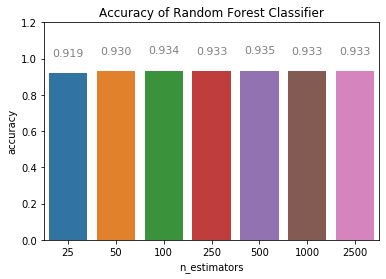

In [16]:
n_estimators = [25, 50, 100, 250, 500, 1000, 2500]
train_scores = []
test_scores = []
for i in n_estimators:
    rf = RandomForestClassifier(random_state=123, n_estimators=i, n_jobs=-1)
    #print(rf)
    train_X, test_X,train_y, test_y = train_test_split(data_rf[all_cols], data_rf[target_col], random_state=111)
    rf.fit(train_X,train_y)
    train_scores.append(rf.score(train_X,train_y))
    test_scores.append(rf.score(test_X,test_y))

ax = sns.barplot(n_estimators, test_scores)

for p in ax.patches:
             ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
_ = ax.set_ylim(0,1.2) #To make space for the annotations
ax.set_xlabel('n_estimators')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy of Random Forest Classifier')

### Model Analysis

In [37]:
def get_label(code):
    for key, val in label_dict.items():
        if code == val:
            return key
    return 'False'

In [38]:
from sklearn.metrics import precision_recall_fscore_support

num_classes = 4
precision,recall, f1score, support = precision_recall_fscore_support(test_y, rf.predict(test_X[all_cols]))
for i in range(num_classes):
    print('Precision for {}: {} '.format(get_label(i+1), precision[i]))
    print('Recall for {}: {} '.format(get_label(i+1), recall[i]))
    print('F1 Score for {}: {} '.format(get_label(i+1), f1score[i]))
    print('\n')

Precision for Minor_Damage_And_Injuries: 0.8919330289193302 
Recall for Minor_Damage_And_Injuries: 0.9406099518459069 
F1 Score for Minor_Damage_And_Injuries: 0.915625 


Precision for Significant_Damage_And_Fatalities: 0.9184652278177458 
Recall for Significant_Damage_And_Fatalities: 0.9341463414634147 
F1 Score for Significant_Damage_And_Fatalities: 0.9262394195888755 


Precision for Significant_Damage_And_Serious_Injuries: 0.9397058823529412 
Recall for Significant_Damage_And_Serious_Injuries: 0.9369501466275659 
F1 Score for Significant_Damage_And_Serious_Injuries: 0.9383259911894273 


Precision for Highly_Fatal_And_Damaging: 0.9718498659517426 
Recall for Highly_Fatal_And_Damaging: 0.9235668789808917 
F1 Score for Highly_Fatal_And_Damaging: 0.9470934030045722 




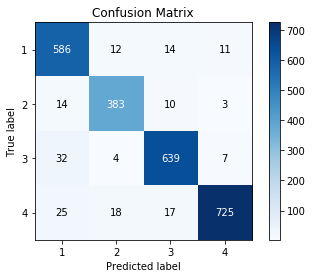

In [25]:
from scikitplot.metrics import plot_confusion_matrix, plot_roc

labels = list(data_rf['Severity'].unique())
plot_confusion_matrix(test_y, rf.predict(test_X[all_cols]))

num_classes = 4
plt.ylim(num_classes-0.5, -0.5)
plt.xlim(-0.5, num_classes-0.5)
#plt.legend(['a','b','c','d'])
plt.show()

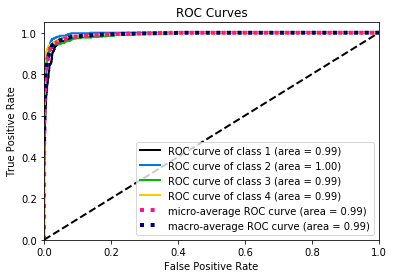

In [26]:
y_proba = rf.predict_proba(test_X[all_cols])
plot_roc(test_y, y_proba)
plt.show()

### Predict Outputs

In [27]:
test_rf['SeverityCode'] = rf.predict(test_rf[all_cols])

In [28]:
def get_key(code):
    for key, val in label_dict.items():
        if code == val:
            return key
    return 'False'
test_rf['Severity'] = test_rf['SeverityCode'].apply(lambda row: get_key(row))

### Save Outputs

In [29]:
test_save = test_rf[['Accident_ID', 'Severity']]

In [30]:
test_save= test_save.set_index('Accident_ID')

In [39]:
test_save.to_csv('./predictions/final_submit_rf.csv')